In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
%tensorflow_version 2.x

Mounted at /content/drive


In [2]:
!pip install tiffile


!pip install gputools

!pip install imagecodecs
!pip install vollseg


In [3]:
%cd '/content/drive/My Drive/VollSeg/'
import os
import glob
import sys
import numpy as np
from tqdm import tqdm
from tifffile import imread, imwrite
from pathlib import Path
from vollseg import SmartSeeds3D



/content/drive/My Drive/VollSeg


# In the cell below specify the following:

1) Directory where the training data is, inside this directory there should be the two subfolders called Raw and Mask. Inside the Raw folder are the raw images and inside the Mask folder are the labelled images.

2) The training data for doing UNET training is stored in NPZ format so please specify the NPZ filename which is suitable for your data.

3) Model directory is where the trained Neural network models are stored, please chooose a location if you want to change the default location which is where the training data is.

4) Copy Model name is optional, in case you have a previouis trained model and want to re-train it on new data but store it with a new name.

5) Model name is the unique name of the trained models.

In [4]:
Data_dir = '/content/drive/My Drive/data/'
NPZ_filename = 'VolumeSeg'
Model_dir = '/content/drive/My Drive/data/'
Model_Name = 'VolumeSeg'

# In this cell choose the network training parameters for the Neural Network

1) NetworkDepth = Depth of the network, with each increasing depth the image is downsampled by 2 hence the XYZ dimension of the data / 2^depth has to be greater than 1.

2) Epochs, training for longer epochs ensures a well converged network and requires longer GPU runtimes.

3) Learning rate is the parameter which controls the step size used in the optimization process and it should not be greater than 0.001 at the start of the training.

4) batch size controls the number of images used for doing stochastic gradient descent and is a parameter that is limited by the GPU RAM available, if you do not have a lot of ran batch size < 10 should be optimal. 

5) PatchX,Y,Z is the patch size used for making patches out of the iamge data. The original image is broken down into patches for training. Patch size is chosen based on having enough context for the network to learn but at the same time not being too big to obscure memory usage.

6) Kernel is the receptive field of the neural network, usual choices are 3,5 or 7 but not larger than that. This is the size of the convolutional kernel used in the network

7) n_patches_per_image is the number of patches sampled for each image to create the npz file, choose an optimal value so that the file is not too big for the computer memory. 

8) Rays is the number of rays used the learn the distance map, low rays decreases the spatial resoultion and high rays are able to resolve the shape better.


9) OpenCL is a boolean parameter that is set true if you want to do some opencl computations on the GPU, this requires GPU tools but if you do not have them set this to false.

Some optimal values have been chosen by default and should work well for any NVDIA enabled GPU computer

In [5]:
#Network training parameters
NetworkDepth = 3
Epochs = 100
LearningRate = 1.0E-4
batch_size = 1
PatchX = 128
PatchY = 128
PatchZ = 16
Kernel = 3
n_patches_per_image = 16
Rays = 128
startfilter = 48
use_gpu_opencl = True
GenerateNPZ = True
TrainUNET = False
TrainSTAR = False

# Generate the npz file first and then train the model

In [6]:

SmartSeeds3D(BaseDir = Data_dir, NPZfilename = NPZ_filename, model_name = Model_Name, model_dir = Model_dir, n_patches_per_image = n_patches_per_image,GenerateNPZ = GenerateNPZ, TrainUNET = TrainUNET, TrainSTAR = TrainSTAR, PatchX= PatchX, PatchY= PatchY, PatchZ = PatchZ,  use_gpu = use_gpu_opencl,  batch_size = batch_size, depth = NetworkDepth, kern_size = Kernel, startfilter = startfilter, n_rays = Rays, epochs = Epochs, learning_rate = LearningRate)

Instance segmentation masks: 24
Semantic segmentation masks: 24


Instance segmentation masks: 24
Semantic segmentation masks: 24
Training StarDistModel model with resnet backbone
24


100%|██████████| 24/24 [00:04<00:00,  4.86it/s]
base_model.py (148): output path for model already exists, files may be overwritten: /content/drive/My Drive/data/VolumeSeg


number of images:  24
- training:        20
- validation:       4
Configuration for a :class:`StarDist3D` model.

    Parameters
    ----------
    axes : str or None
        Axes of the input images.
    rays : Rays_Base, int, or None
        Ray factory (e.g. Ray_GoldenSpiral).
        If an integer then Ray_GoldenSpiral(rays) will be used
    n_channel_in : int
        Number of channels of given input image (default: 1).
    grid : (int,int,int)
        Subsampling factors (must be powers of 2) for each of the axes.
        Model will predict on a subsampled grid for increased efficiency and larger field of view.
    anisotropy : (float,float,float)
        Anisotropy of objects along each of the axes.
        Use ``None`` to disable only for (nearly) isotropic objects shapes.
        Also see ``utils.calculate_extents``.
    backbone : str
        Name of the neural network architecture to be used as backbone.
    kwargs : dict
        Overwrite (or add) configuration attributes (

100/100 [==============================] - 60s 575ms/step - loss: 0.3604 - prob_loss: 0.0119 - dist_loss: 1.7428 - prob_kld: 0.0030 - dist_relevant_mae: 0.8236 - dist_relevant_mse: 1.7426 - val_loss: 0.3773 - val_prob_loss: 0.0044 - val_dist_loss: 1.8646 - val_prob_kld: 0.0014 - val_dist_relevant_mae: 0.8728 - val_dist_relevant_mse: 1.8644
Epoch 2/100
100/100 [==============================] - 56s 562ms/step - loss: 0.3470 - prob_loss: 0.0096 - dist_loss: 1.6874 - prob_kld: 0.0025 - dist_relevant_mae: 0.7823 - dist_relevant_mse: 1.6872 - val_loss: 0.3946 - val_prob_loss: 0.0045 - val_dist_loss: 1.9505 - val_prob_kld: 0.0014 - val_dist_relevant_mae: 0.9006 - val_dist_relevant_mse: 1.9503
Epoch 3/100
100/100 [==============================] - 56s 560ms/step - loss: 0.3428 - prob_loss: 0.0097 - dist_loss: 1.6658 - prob_kld: 0.0024 - dist_relevant_mae: 0.7929 - dist_relevant_mse: 1.6656 - val_loss: 0.4595 - val_prob_loss: 0.0045 - val_dist_loss: 2.2751 - val_prob_kld: 0.0015 - val_dist_rel

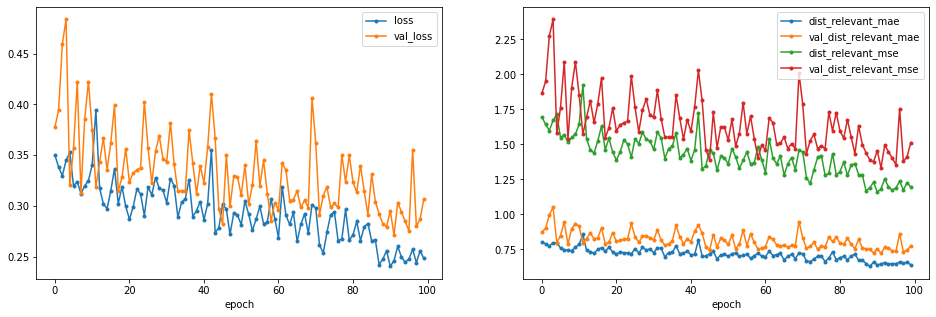

In [7]:

TrainUNET = True
TrainSTAR = True

SmartSeeds3D(BaseDir = Data_dir, NPZfilename = NPZ_filename, model_name = Model_Name, model_dir = Model_dir, n_patches_per_image = n_patches_per_image,GenerateNPZ = False, TrainUNET = TrainUNET, TrainSTAR = TrainSTAR, PatchX= PatchX, PatchY= PatchY, PatchZ = PatchZ,  use_gpu = use_gpu_opencl,  batch_size = batch_size, depth = NetworkDepth, kern_size = Kernel, startfilter = startfilter, n_rays = Rays, epochs = Epochs, learning_rate = LearningRate)